<a href="https://colab.research.google.com/github/manojvenaram/TSA_EXP8/blob/main/time_series_exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")



In [12]:
# Read the Airline Passengers dataset from a CSV file
data = pd.read_csv("/content/airline.csv")



In [13]:
# Display the shape and the first 20 rows of the dataset
print("Shape of the dataset:", data.shape)
print("First 20 rows of the dataset:")
print(data.head(20))



Shape of the dataset: (144, 2)
First 20 rows of the dataset:
      Month  International 
0   1949-01             112
1   1949-02             118
2   1949-03             132
3   1949-04             129
4   1949-05             121
5   1949-06             135
6   1949-07             148
7   1949-08             148
8   1949-09             136
9   1949-10             119
10  1949-11             104
11  1949-12             118
12  1950-01             115
13  1950-02             126
14  1950-03             141
15  1950-04             135
16  1950-05             125
17  1950-06             149
18  1950-07             170
19  1950-08             170


In [14]:
# Set the figure size for plots
plt.rcParams["figure.figsize"] = (10, 6)




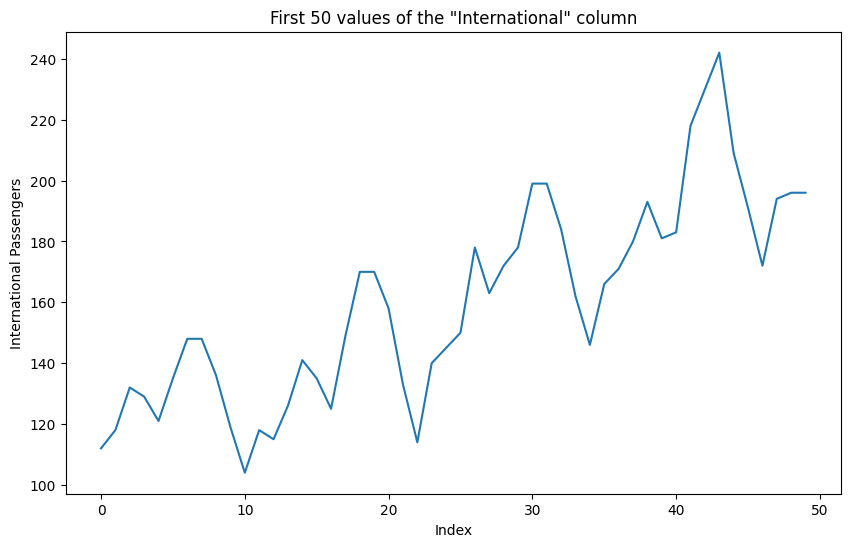

In [15]:
# Plot the first 50 values of the 'International' column
plt.plot(data['International '].head(50))
plt.title('First 50 values of the "International" column')
plt.xlabel('Index')
plt.ylabel('International Passengers')
plt.show()



In [16]:
# Perform rolling average transformation with a window size of 5
rolling_mean_5 = data['International '].rolling(window=5).mean()



In [17]:
# Display the first 10 values of the rolling mean
print("First 10 values of the rolling mean with window size 5:")
print(rolling_mean_5.head(10))



First 10 values of the rolling mean with window size 5:
0      NaN
1      NaN
2      NaN
3      NaN
4    122.4
5    127.0
6    133.0
7    136.2
8    137.6
9    137.2
Name: International , dtype: float64


In [18]:
# Perform rolling average transformation with a window size of 10
rolling_mean_10 = data['International '].rolling(window=10).mean()



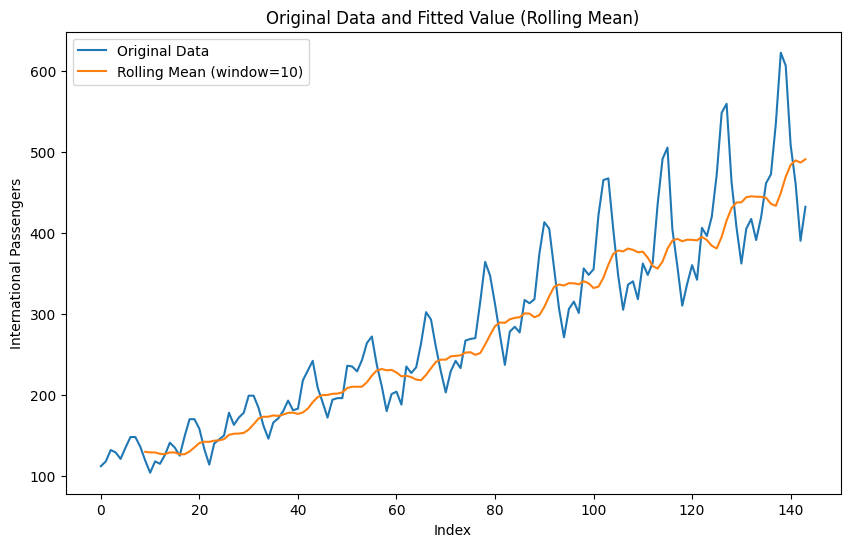

In [19]:
# Create a new figure for plotting
plt.figure()

# Plot the original data and fitted value (rolling mean with window size 10)
plt.plot(data['International '], label='Original Data')
plt.plot(rolling_mean_10, label='Rolling Mean (window=10)')
plt.title('Original Data and Fitted Value (Rolling Mean)')
plt.xlabel('Index')
plt.ylabel('International Passengers')
plt.legend()
plt.show()



In [20]:
# Fit an AutoRegressive (AR) model with 13 lags
lag_order = 13
model = AutoReg(data['International '], lags=lag_order)
model_fit = model.fit()



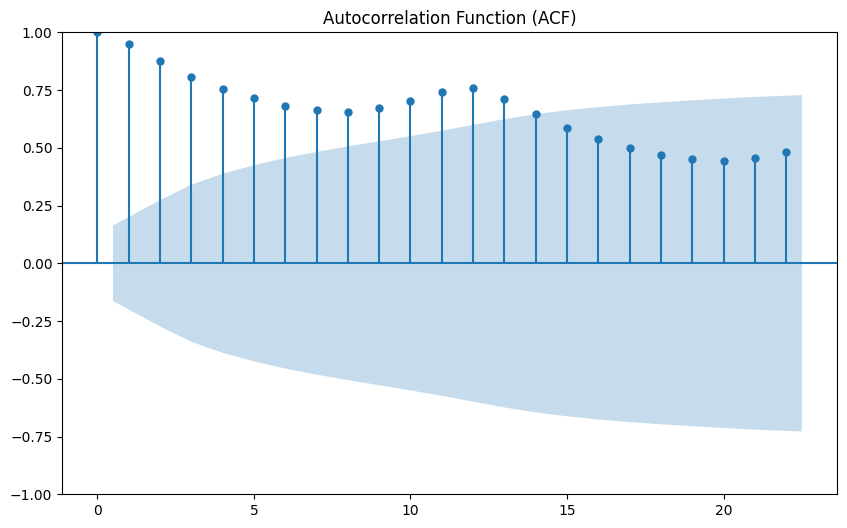

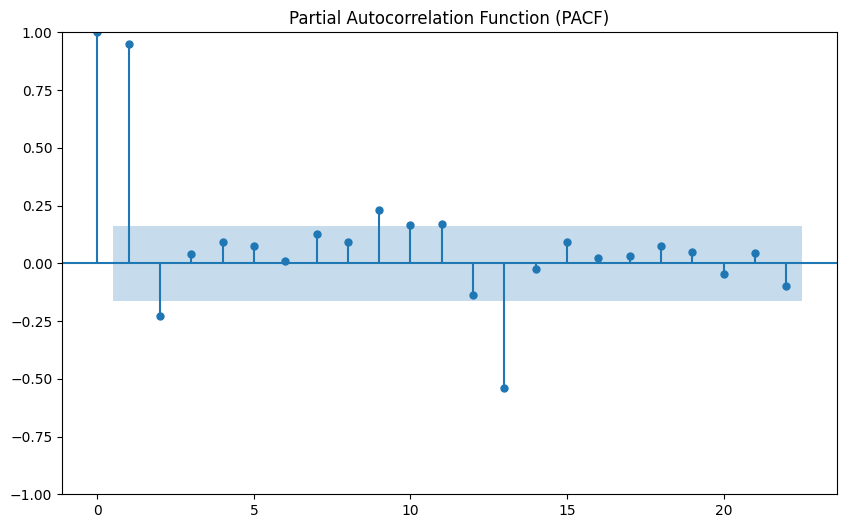

In [21]:
# Plot Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF)
plot_acf(data['International '])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data['International '])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



In [22]:
# Make predictions using the AR model
predictions = model_fit.predict(start=lag_order, end=len(data)-1)



Mean Squared Error (MSE): 117.3414838654672


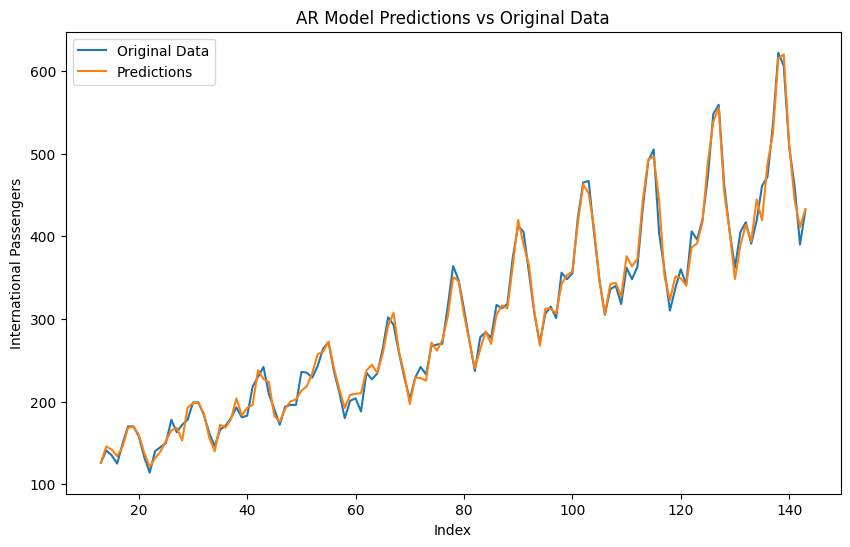

In [23]:
# Compare the predictions with the original data
mse = mean_squared_error(data['International '][lag_order:], predictions)
print('Mean Squared Error (MSE):', mse)

# Plot the original data and predictions
plt.plot(data['International '][lag_order:], label='Original Data')
plt.plot(predictions, label='Predictions')
plt.title('AR Model Predictions vs Original Data')
plt.xlabel('Index')
plt.ylabel('International Passengers')
plt.legend()
plt.show()